<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/exploration/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score

* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target.copy()
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
#How many samples and features are there?

# YOUR CODE HERE
print('number of samples:', df.shape[0], 'number of features:', df.shape[1]-1)

number of samples: 178 number of features: 13


In [13]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
print(df['y'].value_counts())

1    71
0    59
2    48
Name: y, dtype: int64


In [14]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<AxesSubplot:>

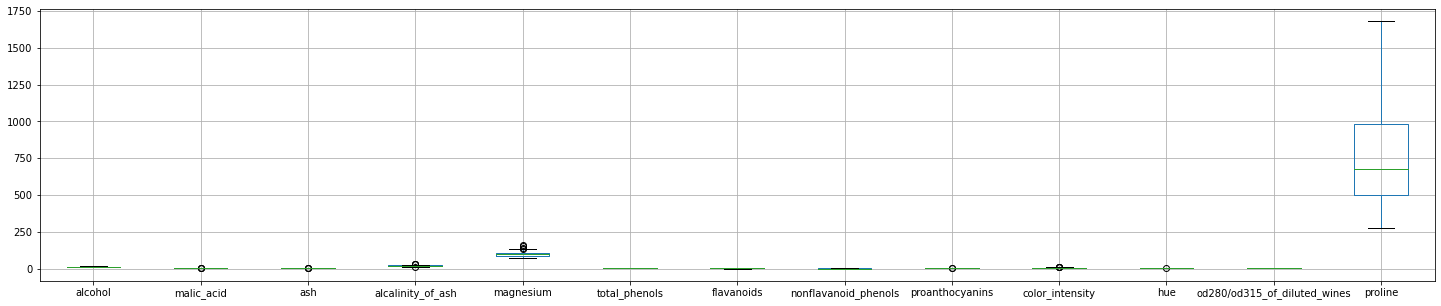

In [25]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
df.drop('y', axis=1).boxplot(figsize = (25, 5))

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

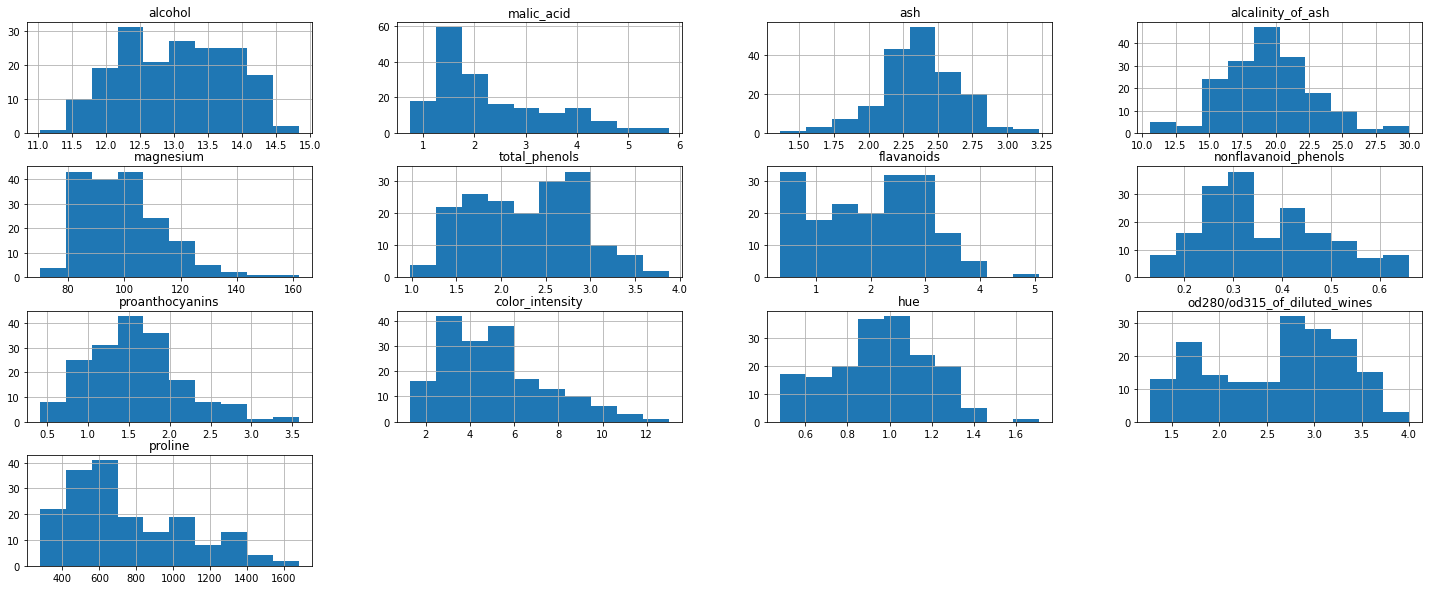

In [26]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
df.drop('y', axis=1).hist(figsize = (25, 10))

Let's do some multivariate analysis

In [35]:
df.drop('y', axis=1).corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot:>

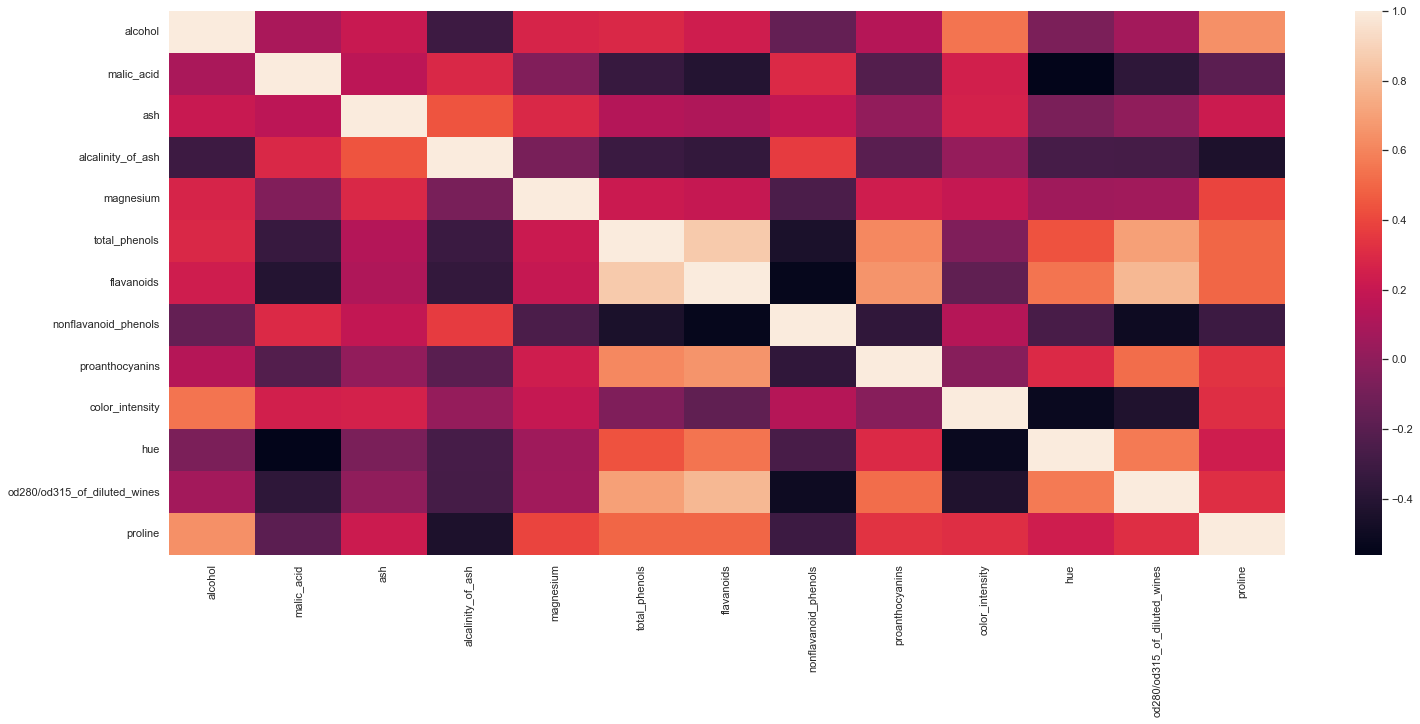

In [34]:
sns.set(rc = {'figure.figsize':(25,10)})
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# Calculate the correlations between each pair of variables
sns.heatmap(df.drop('y', axis=1).corr())

In [36]:
# What is the highest correlation between features?
highestCorr = ('flavanoids', 'total_phenols')
print("The highest correlated pair is: ", highestCorr)

The highest correlated pair is:  ('flavanoids', 'total_phenols')


You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [42]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
num_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

colTransformer = ColumnTransformer([('num', StandardScaler(), num_features)])
X_processed = colTransformer.fit_transform(df.drop('y', axis=1))
print(X_processed.shape)

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
pca_n = PCA(n_components=2)
wine_pca_n = pca_n.fit_transform(X_processed)
np.cumsum(pca_n.explained_variance_ratio_)

(178, 13)


array([0.36198848, 0.55406338])

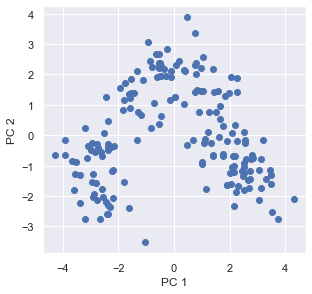

In [45]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
plt.figure(figsize=(16,10))
for i in range(1, 2):
    plt.subplot(2, 3, i)
    plt.scatter(wine_pca_n[:, i-1], wine_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))

In [46]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca_n = PCA(n_components=0.85)
wine_pca_n = pca_n.fit_transform(X_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

In [47]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca_n = PCA(n_components=3)
wine_pca_n = pca_n.fit_transform(X_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



In [49]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
inertias, sil = [], []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X_processed)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(X_processed, y_pred))

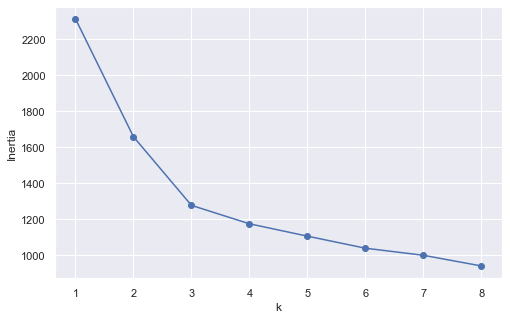

In [50]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

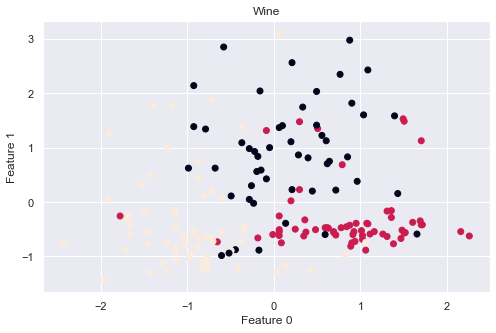

Completeness score=0.873
Silhouette score=0.285


In [54]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
k = 3

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_processed)
# Let's plot the first 2 features (which are the informative ones)
plt.figure(figsize=(8,5))
plt.title("Wine", fontsize=12)
#plt.grid(True)
plt.scatter(X_processed[:, 0], X_processed[:, 1], c=y_pred)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()
# Completeness score
print("Completeness score=%.3f" % completeness_score(df['y'].values, y_pred))
# Silhouette score
print("Silhouette score=%.3f" % silhouette_score(X_processed, y_pred))

Now we can try to understand our clusters.

In [56]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE
df['cluster'] = y_pred
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


<AxesSubplot:>

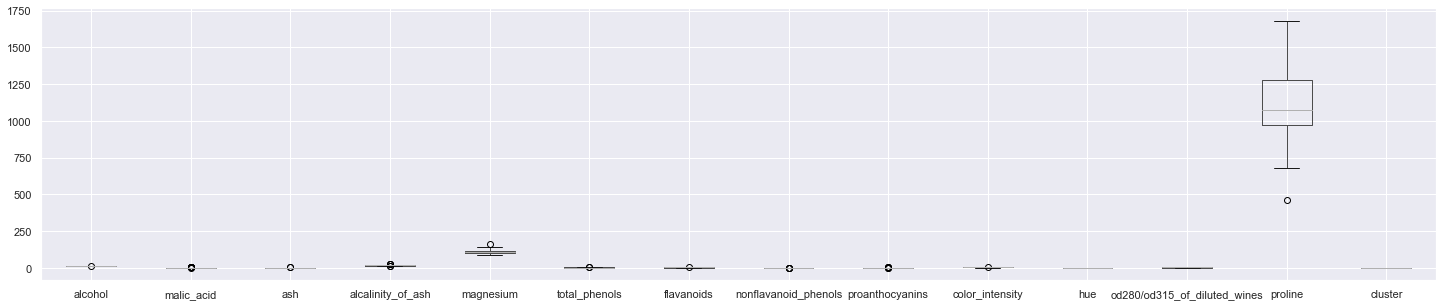

In [67]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE
df[df['cluster'] == 1].drop('y', axis=1).boxplot(figsize = (25, 5))

<AxesSubplot:>

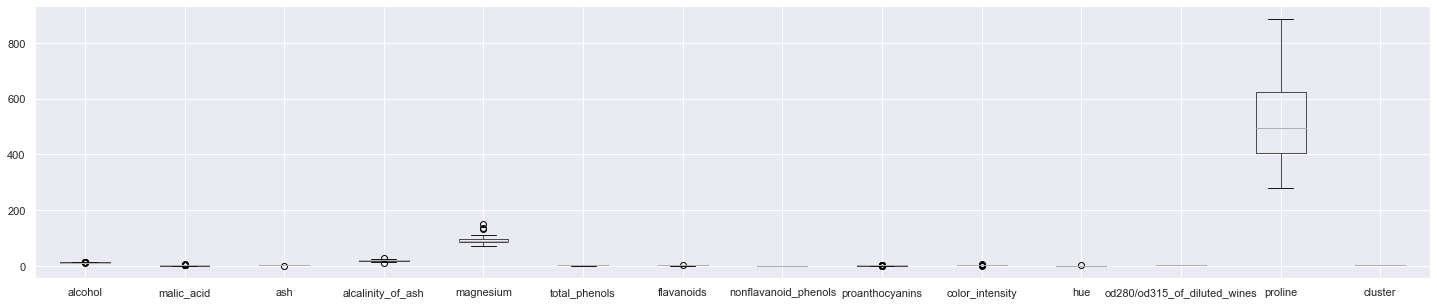

In [68]:
df[df['cluster'] == 2].drop('y', axis=1).boxplot(figsize = (25, 5))

<AxesSubplot:>

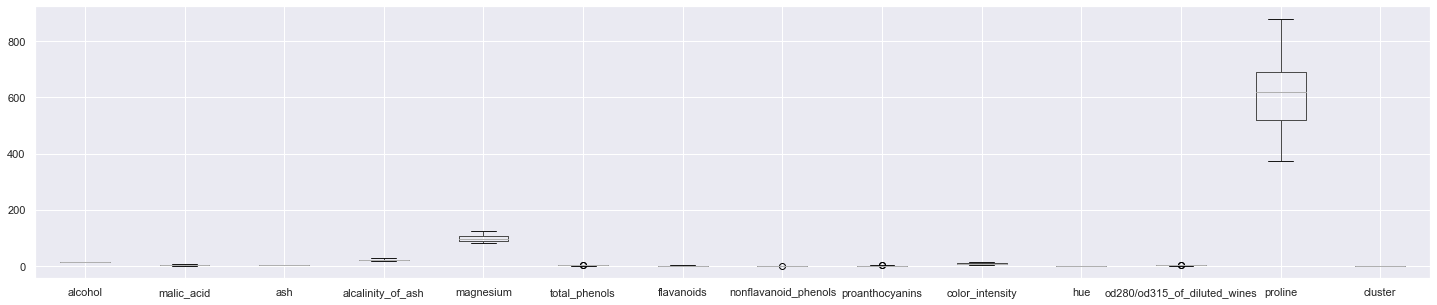

In [69]:
df[df['cluster'] == 0].drop('y', axis=1).boxplot(figsize = (25, 5))

Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!